In [294]:
#We are importing all the required libraries here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import datetime
import time
from matplotlib import style
import statsmodels.api as sm
# plt.style()
plt.style.available
sns.set(style="darkgrid", context="talk", color_codes=True)  
%matplotlib inline

In [295]:
countries = pd.read_csv('Countries.csv')

In [296]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [297]:
del countries['Region']

In [298]:
plot_cols2=['Net migration','Birthrate','Deathrate','Agriculture','Industry','Service','Pop. Density (per sq. mi.)'
      ,'Coastline (coast/area ratio)','Literacy (%)','Arable (%)','Crops (%)',
            'Phones (per 1000)','Infant mortality (per 1000 births)','Other (%)','Climate']

for x in plot_cols2:
    
    countries[x]=countries[x].str.split(',')
    countries[x]=countries[x].astype(object)
    countries[x]=countries[x].str.join('.')
    countries[x]=countries[x].astype(float)

In [299]:
countries.head()

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [300]:
countries=countries.dropna()

In [301]:
countries.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

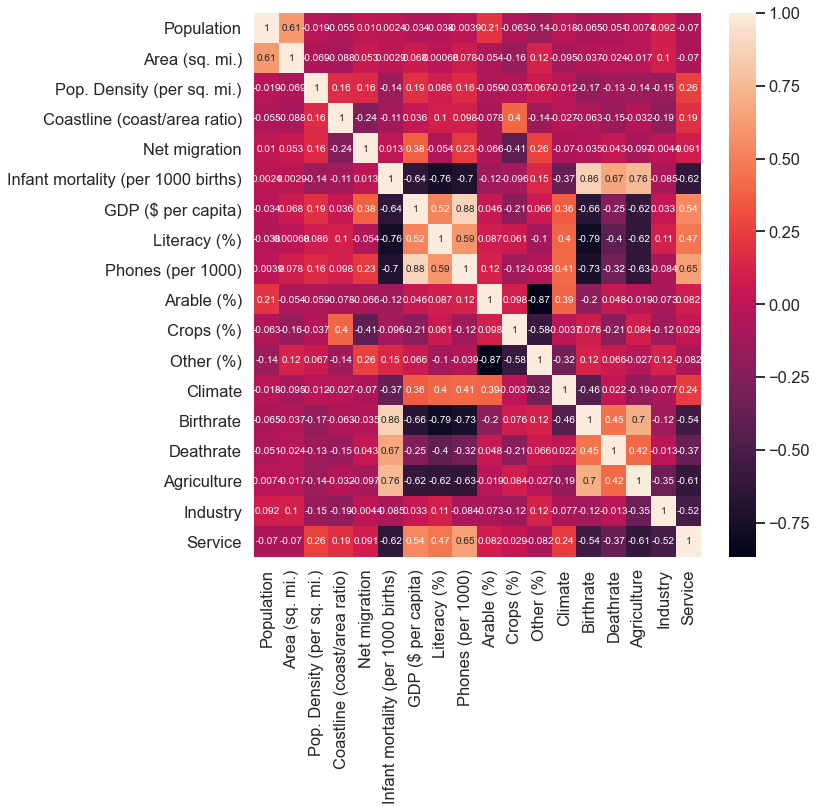

In [302]:
# CORRELATION MATRIX.
corrMatrix = countries.corr()
# print (corrMatrix)
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [303]:
countries.shape

(179, 19)

In [304]:
countries.drop(['Net migration','Arable (%)','Crops (%)','Pop. Density (per sq. mi.)', 'Area (sq. mi.)','Industry',
                'Deathrate','Population','Coastline (coast/area ratio)','Other (%)','Climate'],axis=1,inplace=True)

In [305]:
countries.head(0)

,Country,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service


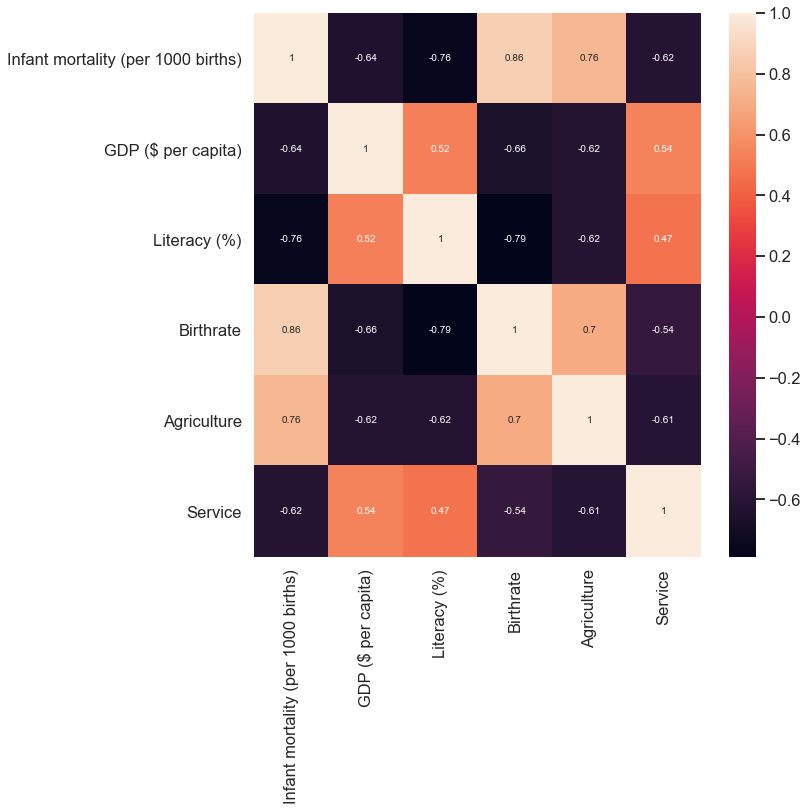

In [306]:
plt.figure(figsize=[10,10])
sns.heatmap(countries.drop('Phones (per 1000)',axis=1).corr(),annot=True)

In [307]:
countries=pd.get_dummies(countries)

In [308]:
# dropping all categorical columns with values <0.5 and >-0.5
cols_to_drop=countries.corr()[(countries.corr()['Phones (per 1000)']<=0.5) & (countries.corr()['Phones (per 1000)']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
countries.drop(cols_to_drop,axis=1,inplace=True)

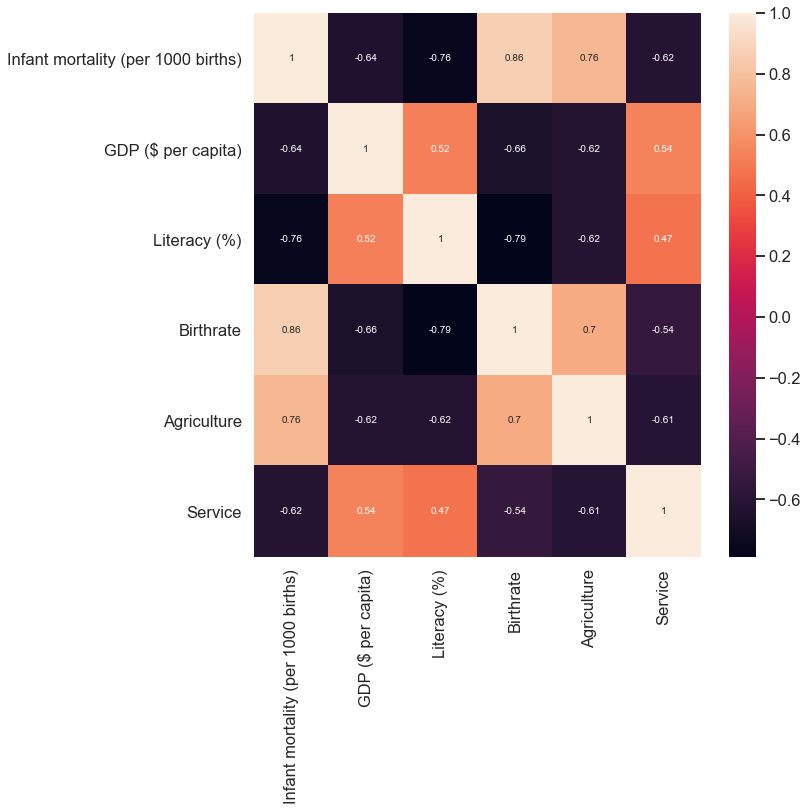

In [309]:
plt.figure(figsize=[10,10])
sns.heatmap(countries.drop('Phones (per 1000)',axis=1).corr(),annot=True)

In [319]:
predictors1=countries[['Birthrate','Service']]
target=countries['Phones (per 1000)']

In [320]:
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     148.3
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.79e-38
Time:                        08:54:46   Log-Likelihood:                -1122.3
No. Observations:                 179   AIC:                             2251.
Df Residuals:                     176   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.3470     55.737      3.379      0.0

Mean_Squared_Error : 16352.051816635989
r_square_value : 0.6275544868232983


Text(0, 0.5, 'Phonesper1000')

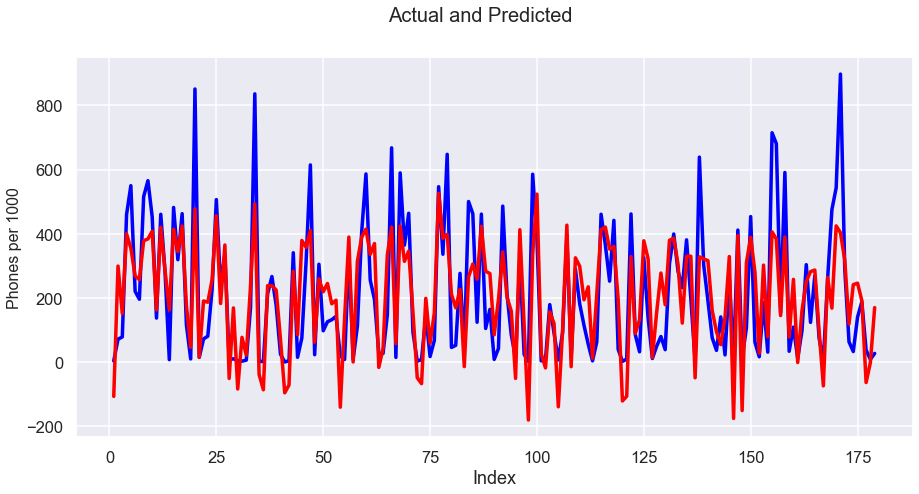

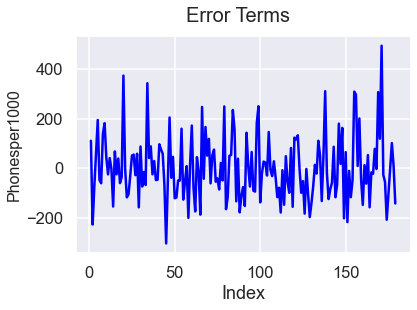

In [321]:
pred=lm_1.predict(predictors1)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     # Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #predicted
fig.suptitle('Actual and Predicted', fontsize=20)            
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Phones per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_1.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)           
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Phonesper1000', fontsize=16)    

In [223]:
predictors2=countries['GDP ($ per capita)']
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     629.8
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.38e-60
Time:                        23:04:03   Log-Likelihood:                -1075.0
No. Observations:                 179   AIC:                             2154.
Df Residuals:                     177   BIC:                             2160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 32.4846     10

Mean_Squared_Error : 9632.316344824489
r_square_value : 0.7806077766657586


Text(0, 0.5, 'Phonesper1000')

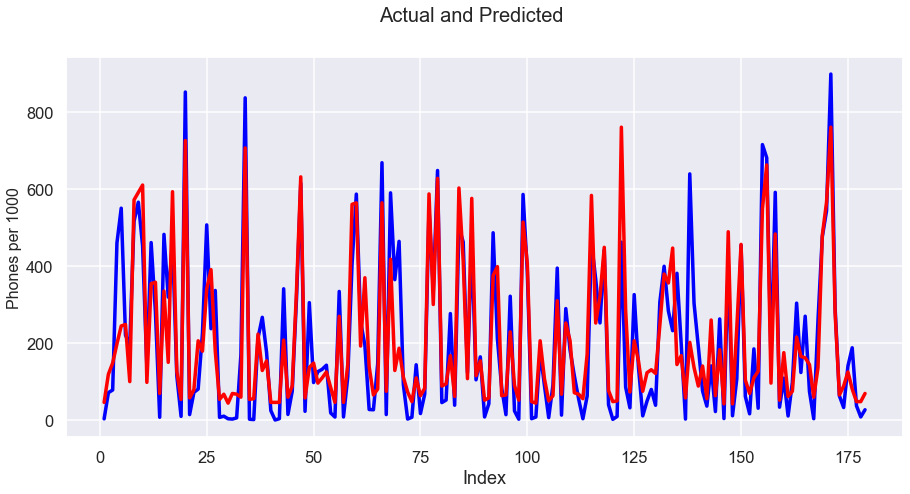

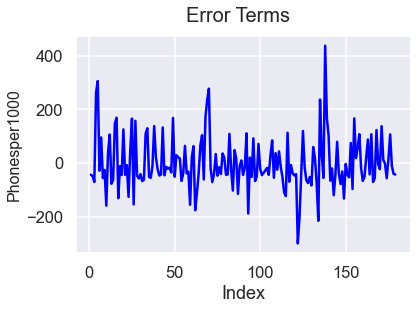

In [224]:
pred=lm_2.predict(predictors2)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Phones per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_2.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Phonesper1000', fontsize=16)    

# strong multicollinearity is being indicated.

In [225]:
# infant mortality taken as predictor.
predictors3=countries['Infant mortality (per 1000 births)']
predictors3= sm.add_constant(predictors3)
lm_3 = sm.OLS(target,predictors3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.36e-27
Time:                        23:05:05   Log-Likelihood:                -1150.7
No. Observations:                 179   AIC:                             2305.
Df Residuals:                     177   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Mean_Squared_Error : 22440.54515265414
r_square_value : 0.48887879948850144


Text(0, 0.5, 'Phonesper1000')

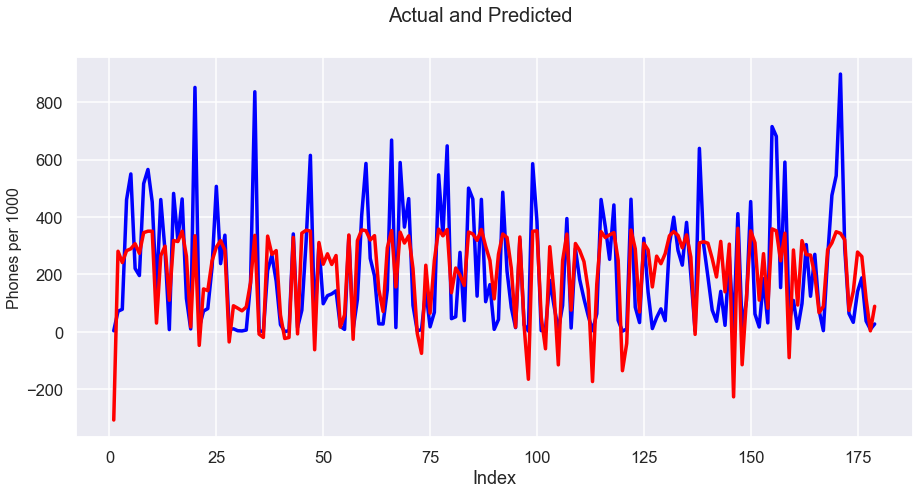

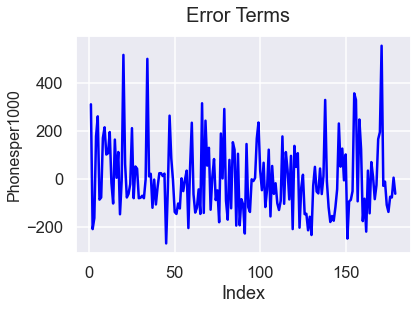

In [226]:
pred=lm_3.predict(predictors3)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])


plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)            
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Phones per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_3.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)           
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Phonesper1000', fontsize=16)    

#not a good model

In [227]:
# literacy as the predictor.
predictors4=countries['Literacy (%)']
predictors4= sm.add_constant(predictors4)
lm_4 = sm.OLS(target,predictors4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     95.52
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.59e-18
Time:                        23:05:39   Log-Likelihood:                -1172.1
No. Observations:                 179   AIC:                             2348.
Df Residuals:                     177   BIC:                             2355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -305.7192     54.088     -5.652   

Mean_Squared_Error : 28515.376642545383
r_square_value : 0.35051428370261695


Text(0, 0.5, 'Phonesper1000')

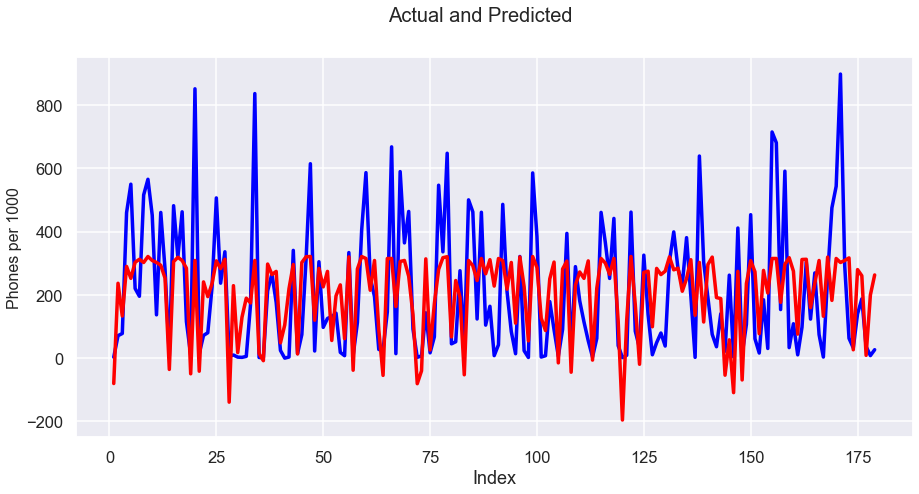

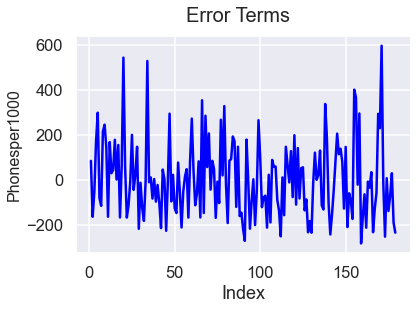

In [228]:
pred=lm_4.predict(predictors4)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Phones per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_4.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)           
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Phonesper1000', fontsize=16)    

#bad model

In [229]:
predictors5=countries['Agriculture']
predictors5= sm.add_constant(predictors5)
lm_5 = sm.OLS(target,predictors5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.57e-21
Time:                        23:06:22   Log-Likelihood:                -1165.2
No. Observations:                 179   AIC:                             2334.
Df Residuals:                     177   BIC:                             2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         345.7377     17.614     19.628      

Mean_Squared_Error : 26391.42193993082
r_square_value : 0.39889092830048667


Text(0, 0.5, 'Phonesper1000')

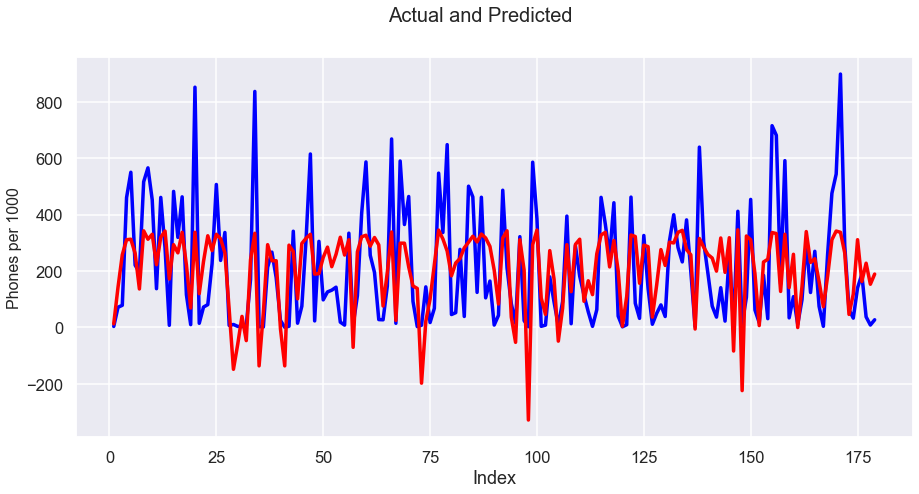

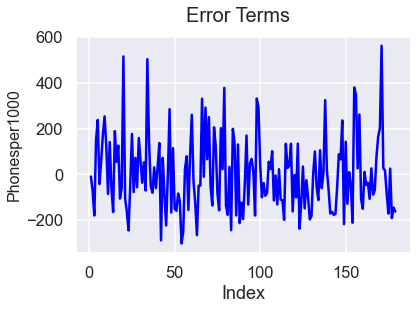

In [230]:
pred=lm_5.predict(predictors5)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])


plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #predicted
fig.suptitle('Actual and Predicted', fontsize=20)          
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Phones per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_5.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Phonesper1000', fontsize=16)    
 
#bad model

In [231]:
# Taking service as a predictor.
predictors6=countries['Service']
predictors6= sm.add_constant(predictors6)
lm_6 = sm.OLS(target,predictors6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           7.76e-23
Time:                        23:06:44   Log-Likelihood:                -1161.7
No. Observations:                 179   AIC:                             2327.
Df Residuals:                     177   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -248.7342     41.934     -5.932      0.0

Mean_Squared_Error : 25375.5211422911
r_square_value : 0.4220297795074408


Text(0, 0.5, 'Phonesper1000')

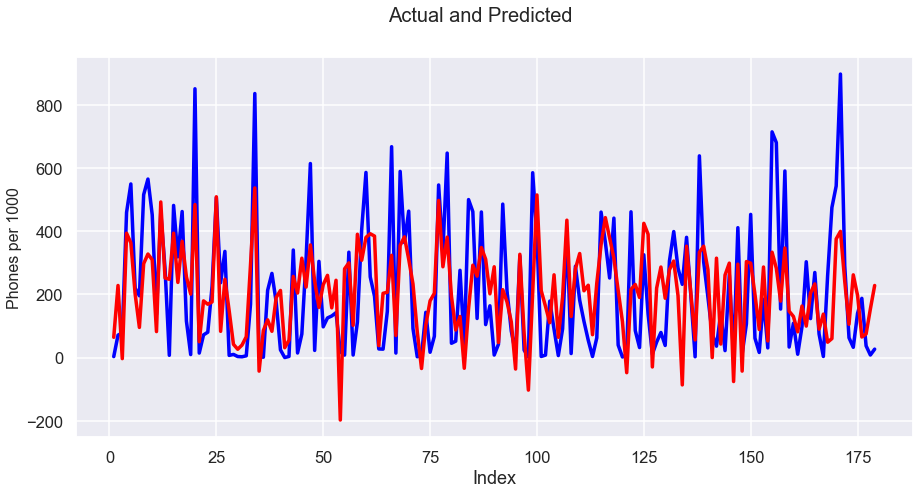

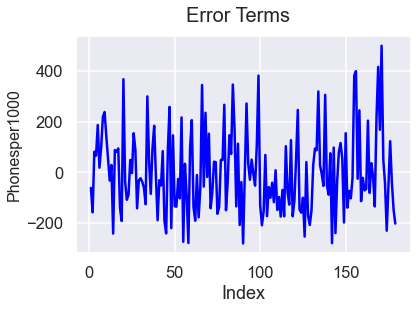

In [192]:
pred=lm_6.predict(predictors6)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #predicted
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Phones per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_6.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)           
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Phonesper1000', fontsize=16)    

#bad model

In [232]:
countries.drop(['Agriculture','Infant mortality (per 1000 births)','Birthrate'],axis=1,inplace=True)

In [233]:
countries.shape

(179, 4)

In [234]:
countries.head(0)

,GDP ($ per capita),Literacy (%),Phones (per 1000),Service


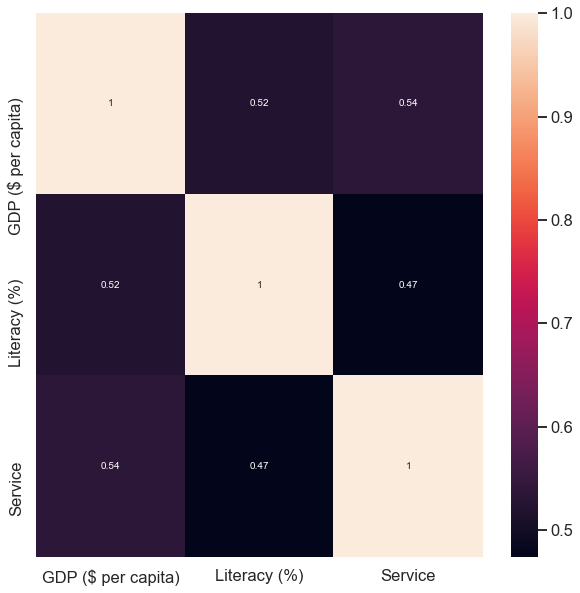

In [235]:
plt.figure(figsize=[10,10])
sns.heatmap(countries.drop('Phones (per 1000)',axis=1).corr(),annot=True)

In [200]:
countries.drop(['Literacy (%)'],axis=1)

,GDP ($ per capita),Phones (per 1000)
0,700.0,3.2
1,4500.0,71.2
2,6000.0,78.1
6,8600.0,460.0
7,11000.0,549.9
...,...,...
218,4800.0,140.1
219,2500.0,187.7
224,800.0,37.2
225,800.0,8.2


In [201]:
# using GDP percapita as a predictor
predictors7=countries['GDP ($ per capita)']
predictors7= sm.add_constant(predictors7)
lm_7 = sm.OLS(target,predictors7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     629.8
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.38e-60
Time:                        20:24:09   Log-Likelihood:                -1075.0
No. Observations:                 179   AIC:                             2154.
Df Residuals:                     177   BIC:                             2160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 32.4846     10

Mean_Squared_Error : 9632.316344824489
r_square_value : 0.7806077766657586


Text(0, 0.5, 'Phonesper1000')

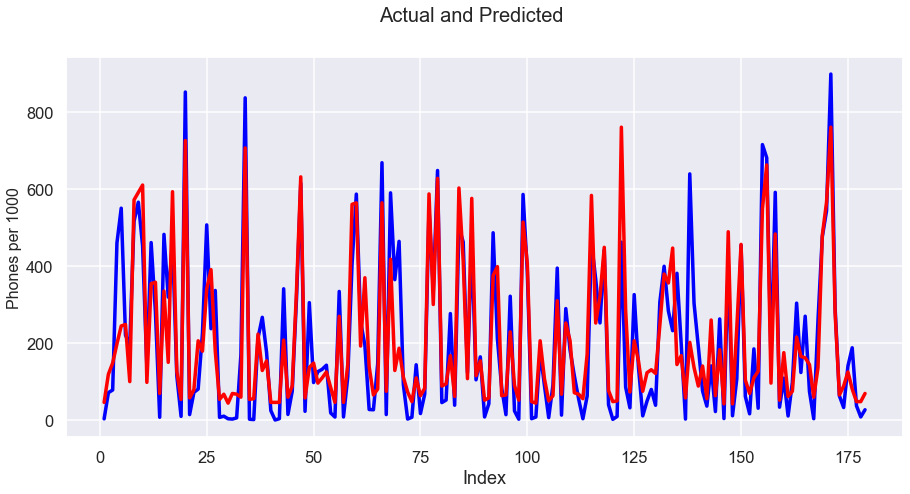

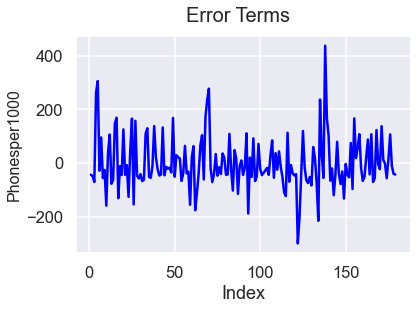

In [202]:
pred=lm_7.predict(predictors7)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Phones per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_7.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Phonesper1000', fontsize=16)    
